In [15]:
%matplotlib inline

import kaggle_util
import pandas as pd
import numpy as np

In [30]:
def ensemble_avito(result_list):
    kaggle_util.ensemble(result_list, True, 
                         competition = 'avito-demand-prediction', 
                         score_col = 'deal_probability',
                         prefix='mix_all')

In [31]:
def ensemble_all():
    result_list = [
            #('lgb_avg_0.2201.csv', 0.4),
            ('xgb_tfidf_0.2210.csv', 0.3),
            #('rnn_0.2209.csv', 0.3),
            #('xgb_tfidf_0.2210.csv', 0.25),
            #('rnn_0.2209.csv', 0.25),
            ('rnn_avg_0.2209.csv', 0.3),
            #('base0_0.2211.csv', 0.15),
            #('lgb_avg_0.2201.csv', 0.35),
            ('lgb_avg_last.csv', 0.4),
            ]
    ensemble_avito(result_list)

In [4]:
def ensemble_r():
    nfold = 5
    result_list = []
    for i in range(1, (nfold+1)):
        subfile = '../result/xgb_tfidf_{}.csv'.format(i)
        result_list.append((subfile, 1 / nfold))
    ensemble_avito(result_list)

In [5]:
#ensemble_r()

score_col  deal_probability


100%|██████████| 5/5 [00:00<00:00, 60.80it/s]


          p0        p1        p2        p3        p4
p0  1.000000  0.965069  0.965066  0.965031  0.965752
p1  0.965069  1.000000  0.964967  0.964769  0.965549
p2  0.965066  0.964967  1.000000  0.964965  0.965558
p3  0.965031  0.964769  0.964965  1.000000  0.965581
p4  0.965752  0.965549  0.965558  0.965581  1.000000
save result
upload result
cmd: /home/kownse/anaconda3/bin/kaggle competitions submit -c avito-demand-prediction -f ../result/ensemble_06-27-15-38.csv.7z -m "submit"


In [32]:
ensemble_all()

score_col  deal_probability


100%|██████████| 3/3 [00:00<00:00, 66.00it/s]


          p0        p1        p2
p0  1.000000  0.930916  0.941373
p1  0.930916  1.000000  0.945838
p2  0.941373  0.945838  1.000000
save result
upload result
cmd: /home/kownse/anaconda3/bin/kaggle competitions submit -c avito-demand-prediction -f ../result/mix_all_06-28-09-53.csv.7z -m "submit"


In [3]:
regional = pd.read_csv('../input/regional.csv')

In [11]:
regional.income = np.log(regional.income)

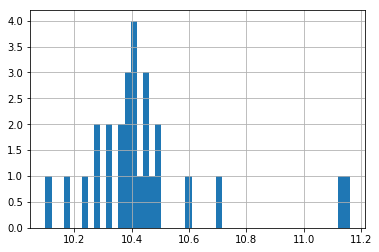

In [12]:
regional.income.hist(bins=50)

In [8]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [9]:
softmax([1, -2, 0.5])

array([0.6037489 , 0.03005889, 0.36619222])